In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [421]:
#df = pd.read_csv("IMDb movies.csv")
url = 'https://github.com/kito323/02450movies/raw/master/IMDb_movies.csv'
categories = ['year', 'genre','duration', 'avg_vote','votes','metascore','reviews_from_users','reviews_from_critics']
df = pd.read_csv("02450movies/IMDb_movies.csv", usecols=categories)

In [422]:
df.head(3)

year                    genre  duration  avg_vote  votes  metascore  \
0  1894                  Romance        45       5.9    154        NaN   
1  1906  Biography, Crime, Drama        70       6.1    589        NaN   
2  1911                    Drama        53       5.8    188        NaN   

   reviews_from_users  reviews_from_critics  
0                 1.0                   2.0  
1                 7.0                   7.0  
2                 5.0                   2.0

In [423]:
df.describe()

year      duration      avg_vote         votes     metascore  \
count  85855.000000  85855.000000  85855.000000  8.585500e+04  13305.000000   
mean    1993.500891    100.351418      5.898656  9.493490e+03     55.896881   
std       24.216420     22.553848      1.234987  5.357436e+04     17.784874   
min     1894.000000     41.000000      1.000000  9.900000e+01      1.000000   
25%     1979.000000     88.000000      5.200000  2.050000e+02     43.000000   
50%     2003.000000     96.000000      6.100000  4.840000e+02     57.000000   
75%     2013.000000    108.000000      6.800000  1.766500e+03     69.000000   
max     2020.000000    808.000000      9.900000  2.278845e+06    100.000000   

       reviews_from_users  reviews_from_critics  
count        78258.000000          74058.000000  
mean            46.040826             27.479989  
std            178.511411             58.339158  
min              1.000000              1.000000  
25%              4.000000              3.000000  
50%              9.000000              8.000000  
75%             27.000000             23.000000  
max          10472.000000            999.000000

In [424]:
#sort dataframe on dates
df2 = np.array(df)
df_sorted = df2[df2[:,0].argsort()]
df = pd.DataFrame(df_sorted, columns=categories)
N = 45000
df_end = df.iloc[-N:]

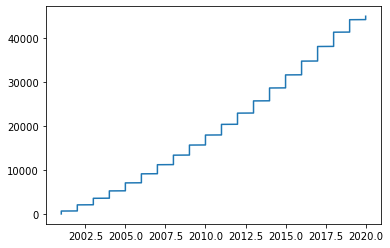

In [425]:
plt.figure()
plt.plot(df_end['year'], range(N))
plt.show()

In [427]:
for i in range(len(df_end['genre'])):
    df_end.iloc[i,1] = df_end.iloc[i,1].split(sep=', ')

C:\Users\andre\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [428]:
pd.set_option('display.max_columns', None)
#https://stackoverflow.com/a/47786880
dfk = df_end['genre'].str.join('|').str.get_dummies()
df = pd.concat([df_end,dfk], axis=1).drop(columns='genre').dropna(axis=0)
df = df.loc[:, (df != 0).any(axis=0)]
df

year duration avg_vote  votes metascore reviews_from_users  \
40858  2001      103      6.7  37285        52                182   
40860  2001      116      7.3   4478        79                 29   
40863  2001       97      6.1  23187        32                168   
40864  2001      121      6.4  10509        48                135   
40868  2001       95      5.6   2714        53                 42   
...     ...      ...      ...    ...       ...                ...   
85803  2020      113      6.3   6014        61                112   
85813  2020      107      6.5  17187        61                221   
85851  2020       99      6.5  74639        47               1018   
85852  2020      151      7.2    407        81                  4   
85854  2020      101      5.6  39245        26                680   

      reviews_from_critics  Action  Adventure  Animation  Biography  Comedy  \
40858                   95       0          0          0          0       1   
40860                   64       0          0          0          0       0   
40863                   54       0          0          0          0       1   
40864                   71       0          0          0          0       0   
40868                   36       0          0          0          0       1   
...                    ...     ...        ...        ...        ...     ...   
85803                   92       0          0          0          0       0   
85813                   55       0          0          0          0       0   
85851                  250       1          1          0          0       1   
85852                   28       0          0          0          0       0   
85854                  180       0          1          0          0       1   

       Crime  Drama  Family  Fantasy  History  Horror  Music  Musical  \
40858      1      0       0        0        0       0      0        0   
40860      0      1       0        0        0       0      0        0   
40863      0      0       0        0        0       0      0        0   
40864      0      1       0        0        0       0      0        0   
40868      0      1       0        0        0       0      0        0   
...      ...    ...     ...      ...      ...     ...    ...      ...   
85803      0      1       0        0        0       1      0        0   
85813      0      1       0        0        0       0      0        0   
85851      0      0       0        0        0       0      0        0   
85852      0      1       0        0        0       0      0        0   
85854      0      0       1        0        0       0      0        0   

       Mystery  Romance  Sci-Fi  Sport  Thriller  War  Western  
40858        1        0       0      0         0    0        0  
40860        0        1       0      0         0    0        0  
40863        0        1       0      0         0    0        0  
40864        0        1       0      0         1    0        0  
40868        0        1       0      0         0    0        0  
...        ...      ...     ...    ...       ...  ...      ...  
85803        0        0       1      0         0    0        0  
85813        0        1       0      0         0    0        0  
85851        0        0       0      0         0    0        0  
85852        0        0       0      0         0    0        0  
85854        0        0       0      0         0    0        0  

[9294 rows x 27 columns]

In [429]:
df.to_csv('cleaned data.csv')

In [450]:
df.astype(float).describe()

year     duration     avg_vote         votes    metascore  \
count  9294.000000  9294.000000  9294.000000  9.294000e+03  9294.000000   
mean   2011.310523   103.809555     6.222692  5.107731e+04    54.733484   
std       5.389168    19.827479     0.950569  1.187584e+05    17.185854   
min    2001.000000    50.000000     1.400000  1.030000e+02     1.000000   
25%    2007.000000    92.000000     5.700000  1.876000e+03    42.000000   
50%    2012.000000   100.000000     6.300000  8.665000e+03    55.000000   
75%    2016.000000   112.000000     6.900000  4.316125e+04    67.750000   
max    2020.000000   808.000000     9.000000  2.241615e+06   100.000000   

       reviews_from_users  reviews_from_critics       Action    Adventure  \
count          9294.00000           9294.000000  9294.000000  9294.000000   
mean            191.01431            113.909834     0.164192     0.113837   
std             407.32491            118.923573     0.370470     0.317630   
min               1.00000              1.000000     0.000000     0.000000   
25%              19.00000             30.000000     0.000000     0.000000   
50%              60.00000             71.000000     0.000000     0.000000   
75%             196.00000            157.000000     0.000000     0.000000   
max           10472.00000            999.000000     1.000000     1.000000   

         Animation    Biography       Comedy        Crime        Drama  \
count  9294.000000  9294.000000  9294.000000  9294.000000  9294.000000   
mean      0.039488     0.067140     0.343663     0.151926     0.668065   
std       0.194763     0.250278     0.474956     0.358968     0.470933   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     1.000000   
75%       0.000000     0.000000     1.000000     0.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            Family      Fantasy      History       Horror        Music  \
count  9294.000000  9294.000000  9294.000000  9294.000000  9294.000000   
mean      0.040349     0.058210     0.034323     0.101356     0.031203   
std       0.196786     0.234152     0.182068     0.301815     0.173875   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

           Musical      Mystery      Romance       Sci-Fi        Sport  \
count  9294.000000  9294.000000  9294.000000  9294.000000  9294.000000   
mean      0.009791     0.083602     0.180977     0.047558     0.017323   
std       0.098470     0.276805     0.385020     0.212840     0.130479   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          Thriller          War      Western  
count  9294.000000  9294.000000  9294.000000  
mean      0.153648     0.019798     0.005380  
std       0.360630     0.139312     0.073154  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000

In [343]:
from pandas_profiling import ProfileReport

In [401]:
profile = ProfileReport(df, title="Movies", html={'style': {'full_width': True}})
profile.to_notebook_iframe()